<h1>Diabetes</h1>



![Data](https://github.com/def-abraham/Projects/blob/main/Project%201/BloodGlucose%20Medium.jpeg?raw=true)

<h2><u><b>Introduction</b></u></h2>

Diabetes is a chronic health condition that affects how the body processes blood glucose, leading to serious medical complications if left unmanaged. Accurate and early prediction of diabetes can significantly improve patient outcomes through timely intervention and preventive care. With the growing availability of health datasets and the advancement of machine learning algorithms, data-driven approaches are becoming increasingly valuable in healthcare diagnostics.

This project aims to develop a predictive model for diabetes diagnosis using a well-known dataset containing patient health metrics such as glucose levels, BMI, age, and insulin levels. The analysis follows a rigorous data science workflow, beginning with a comprehensive exploratory data analysis (EDA) based on the "Seven Stories One Can Tell With Data." After thoroughly understanding and preparing the data, a logistic regression model wil be implemented to classify patients as diabetic or non-diabetic.

Further model performance will be evaluated using both custom-built evaluation metrics (accuracy, precision, recall, specificity, and F1-score) and comparisons to Python’s built-in libraries. To address class imbalance in the dataset; a common issue in medical data; the Synthetic Minority Over-sampling Technique (SMOTE) will be applied, retraining the model, and reassessing its effectiveness.

Finally, to benchmark the logistic regression model, an alternative classification model will be implemented using either Support Vector Machines (SVM) or K-Nearest Neighbors (KNN) and compare their predictive performance. This comprehensive approach ensures not only the development of an accurate predictive model but also a critical assessment of feature significance, class imbalance, and model interpretability.


<h3><u><b>Data Summary</b></u></h3>

This data set contains 768 records, 9 attributes, 268 positive results for diabetes test and 500 negative result. All patients were females at least 21 years old.

<table border="1" style="border-collapse: collapse; width: 100%;">
    <tr> <th>Feature</th> <th>Description</th> </tr>
    <tr> <td><b>Pregnancies</b></td> <td>Number of times pregnant</td> </tr>
    <tr> <td><b>Glucose</b></td> <td>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</td> </tr>
    <tr> <td><b>BloodPressure</b></td> <td>Diastolic blood pressure (mm Hg)</td> </tr>
    <tr> <td><b>SkinThickness</b></td> <td>Triceps skin fold thickness (mm)</td> </tr>
    <tr> <td><b>Insulin</b></td> <td>2-Hour serum insulin (μU/ml)</td> </tr>
    <tr> <td><b>BMI</b></td> <td>Body mass index (weight in kg/(height in m)²)</td> </tr>
    <tr> <td><b>DiabetesPedigreeFunction</b></td> <td>Diabetes pedigree function (family history score)</td> </tr>
    <tr> <td><b>Age</b></td> <td>Age in years</td> </tr>
    <tr> <td><b>Outcome</b></td> <td><b>Target variable:</b> 1 = diabetic, 0 = non-diabetic</td> </tr>
</table>



In [70]:
# Geneal libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import zscore
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection, preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.stats import ttest_ind
pd_df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/project/diabetes.csv')

pd_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
#load the diabetes dataset
df = pd.read_csv('https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/diabetes.csv')

#show the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
#check the number of rows and columns
print("Shape:", df.shape)

Shape: (768, 9)


###  1. Who / What / When / Where
This dataset consists of health records of 768 female patients of Pima Indian heritage, all aged at least 21. The goal is to predict whether a person has diabetes (`Outcome = 1`) or not (`Outcome = 0`). It includes 8 features such as glucose level, blood pressure, BMI, and others, with one target label: `Outcome`. This information helps in understanding the context and variables.

### 2. How Many
Exploring the class distribution (diabetic vs. non-diabetic), generate descriptive statistics, and look at feature distributions through histograms. This help to understand data frequency and spread.

In [ ]:
# Class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (Diabetes Presence)')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Descriptive statistics
df.describe()

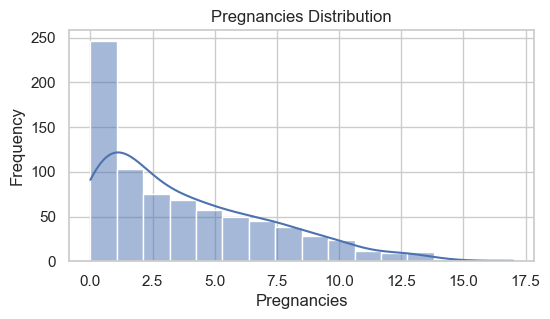

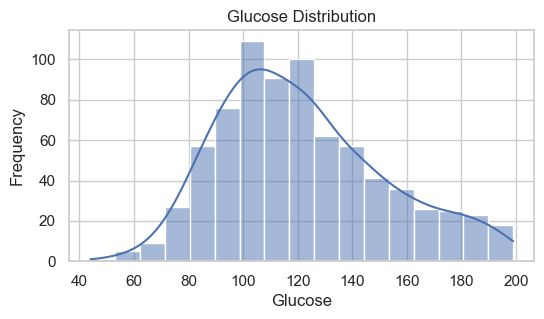

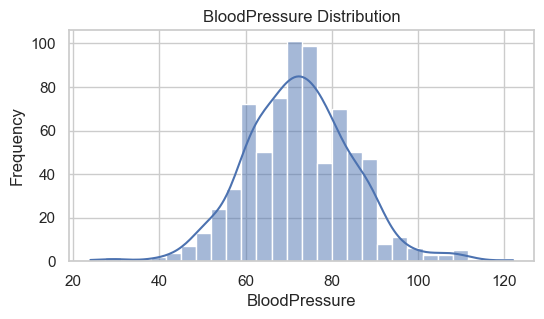

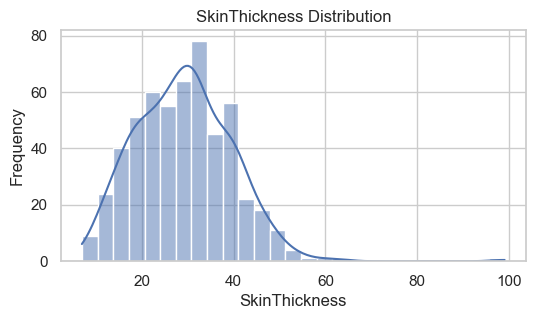

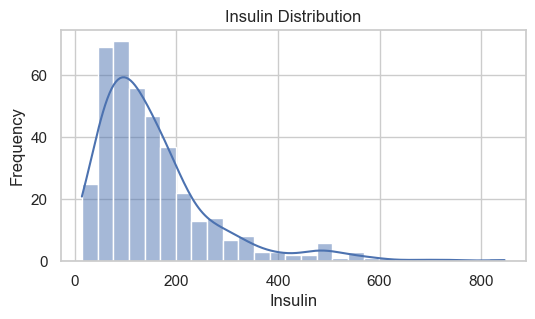

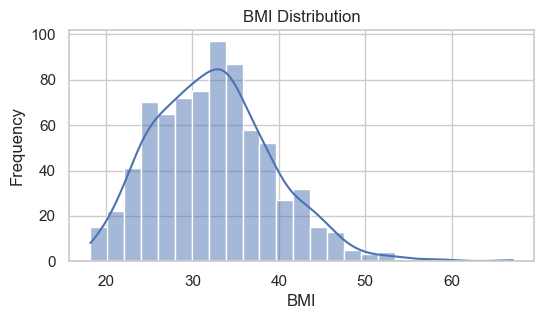

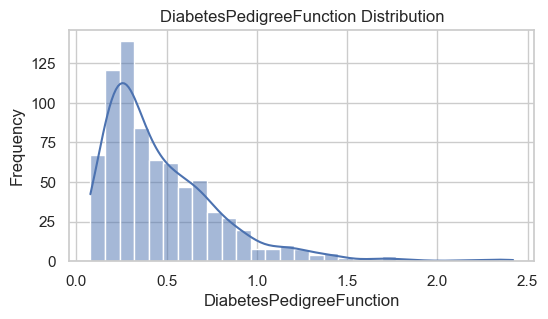

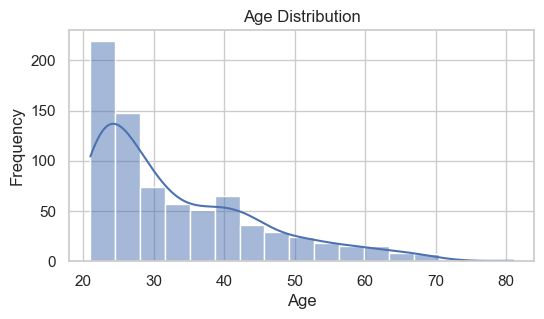

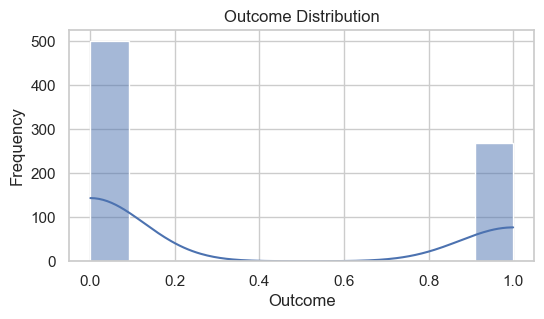

In [71]:
# Histograms of each feature
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

###  3. How Often
Although there is no timestamp, we can examine how often diabetes occurs in different age groups. This provides insight into frequency by demographic.

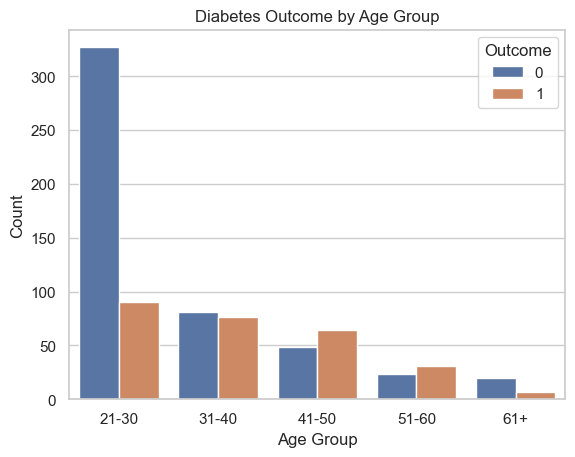

In [47]:
# Age group analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=["21-30", "31-40", "41-50", "51-60", "61+"])
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title('Diabetes Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### 4. What’s Changing
Comparing how feature values vary depending on the diabetes outcome. Boxplots show if feature distributions shift between diabetic and non-diabetic individuals.

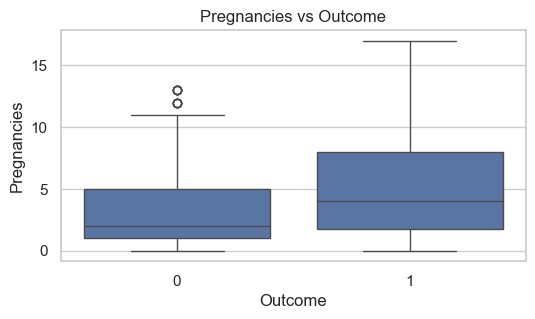

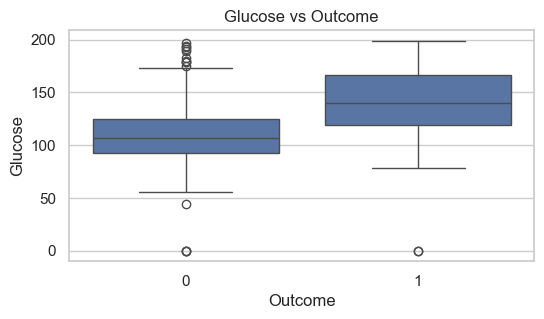

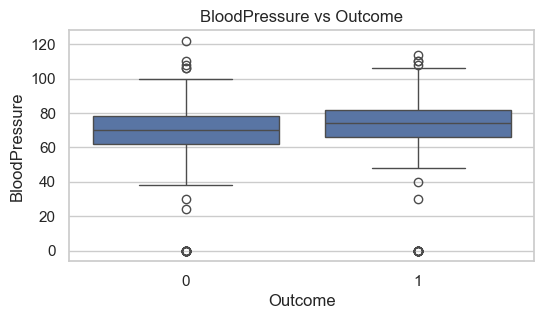

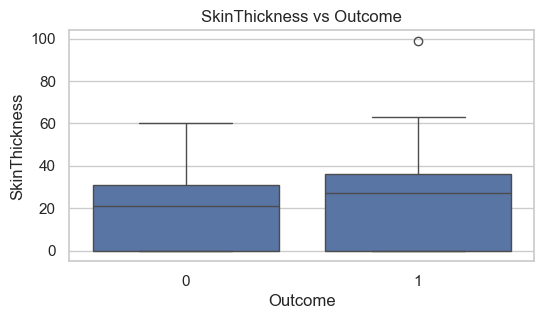

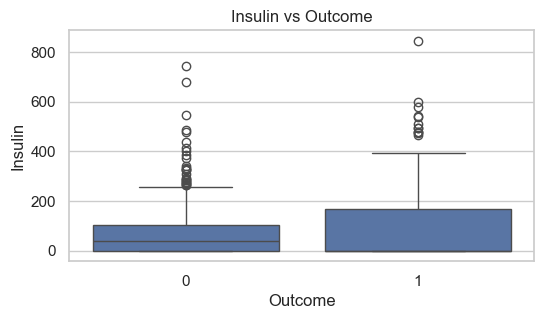

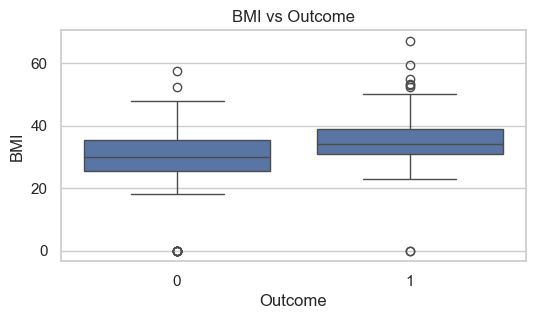

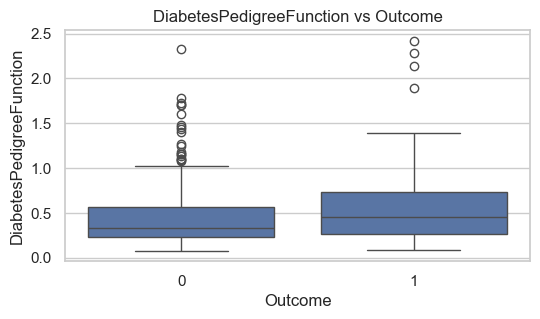

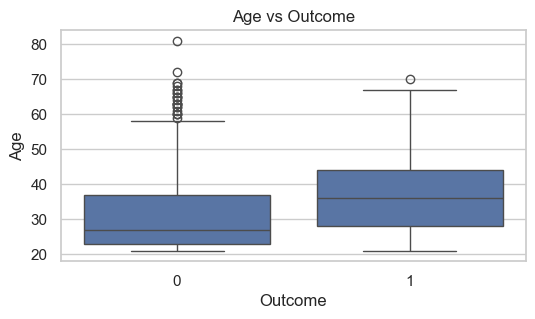

In [48]:
# Boxplots by outcome
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')
    plt.show()

###  5. How is it Organized
Examining relationships among variables using a correlation heatmap. This reveals how features like glucose and insulin may be related.

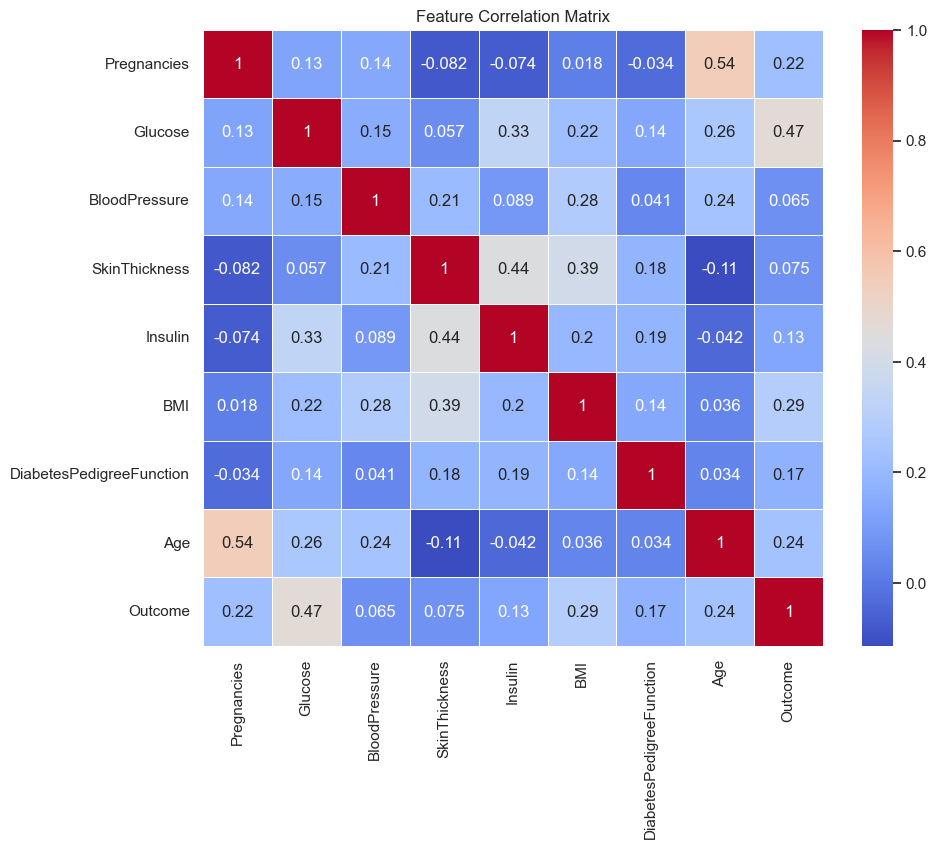

In [49]:
# Correlation matrix with only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


###  6. Where is it Happening
This dataset does not contain geographic information, so spatial analysis is not applicable.

###  7. Is it Good or Bad
Comparing average values of each feature by diabetes outcome. This helps identify which health metrics are more associated with diabetes.

In [50]:
# Mean of only numeric columns grouped by diabetes outcome
df.select_dtypes(include='number').groupby(df['Outcome']).mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0


In [51]:
# check data type
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
AgeGroup                    category
dtype: object

In [52]:
#look for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup                    0
dtype: int64

The dataset has 768 rows and 9 columns, with 8 features and the target variable "Outcome". There are no missing values so there won’t need to impute data. However, some features like "Glucose", "BloodPressure", and "BMI" have minimum values of 0, which seems unrealistic, so they may represent missing values, errors or placeholders.

In [53]:
# check if unique value in each column
df.nunique().sort_values()

Outcome                       2
AgeGroup                      5
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

There is no third unique value in outcome column.

<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

In [54]:
#basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The summary stats show the average patient has about 3.8 pregnancies, a glucose level of 120.9, and an age of 33.2 years. The "Outcome" mean of 0.35 indicates that 35% of patients have diabetes, while 65% do not. This indicates a class imbalance that could affect the ability of the machine learning models to correctly predict diabetes.

In [55]:
#style for plots
sns.set(style='whitegrid')

#data structure
print("Data types:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  768 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.1 KB
Data types:
 None


The dataset includes 7 integer and 2 float columns, all fully populated with no missing values.**


In [56]:
# Calculate correlation using only numeric columns
corr_val = df.select_dtypes(include='number').corr()
corr_val


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the above graph that outcome and glucose are related,but not strongly related. Rest does not seem related.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

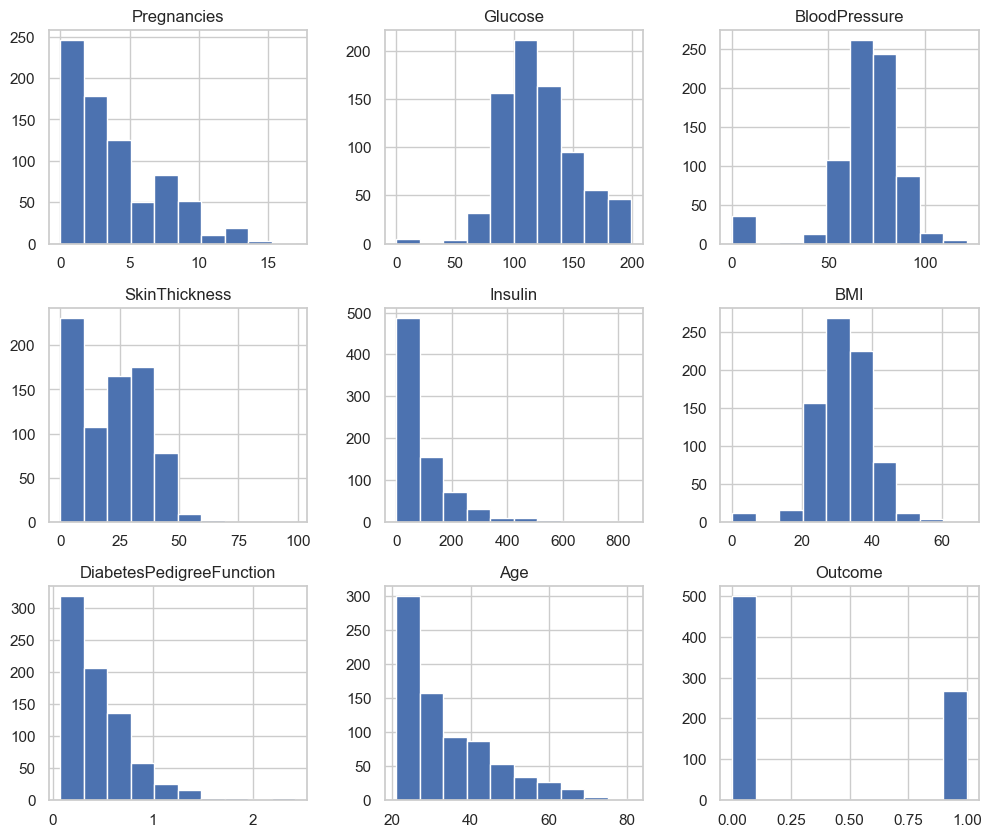

In [57]:
#univariate analysis
df.hist(figsize=(12, 10))

The histograms show the spread of each feature. "Glucose" and "BMI" show approximate bell-like shape, while "Insulin" shows a right-skewed distribution, an indication that most observations lean heavily toward lower values with several high-insulin level outliers. The "Outcome" variable is binary since it has either of "1" or "0" as its values.

<Axes: >

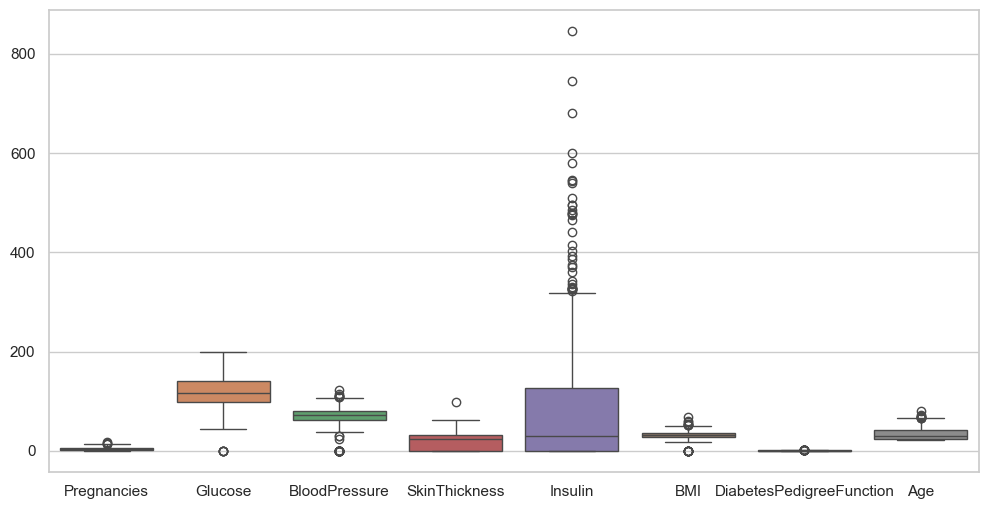

In [58]:
#check outliers with box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))

The boxplots clearly show the outliers for each numerical feature. There are prominent outliers for the "Insulin" feature, "BloodPressure", "BMI", and "Age". These outliers could skew machine learning model if not managed.

<Axes: xlabel='Glucose', ylabel='Insulin'>

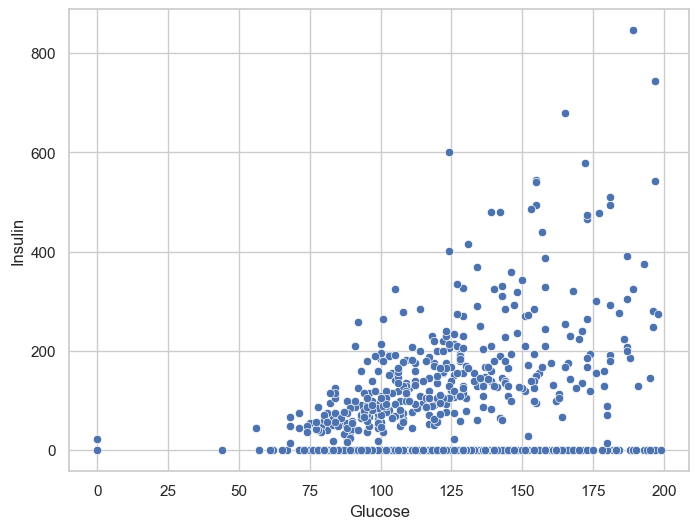

In [59]:
#bivariate analysis through scatterplot of Glucose vs insulin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df)

Higher glucose levels tend to pair with higher insulin in general as per the scatterplot between the two features. While there’s some trend, the wide spread among points suggests that other factors may play a role in this relationship.

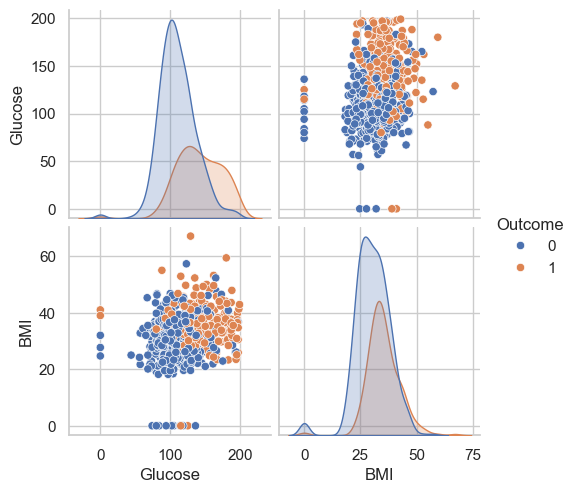

In [60]:
#multivariate analysis through pairs plot
pairplot = sns.pairplot(df[['Glucose', 'BMI', 'Outcome']], hue='Outcome')

The pairs plot between "Glucose" and "BMI" indicates that the glucose levels are a better separator between diabetic and non-diabetic patients, from the clustering of diabetic patients at higher glucose values. However, the two clusters overlap with non-diabetic cases shows it’s not a clean split.

<Axes: >

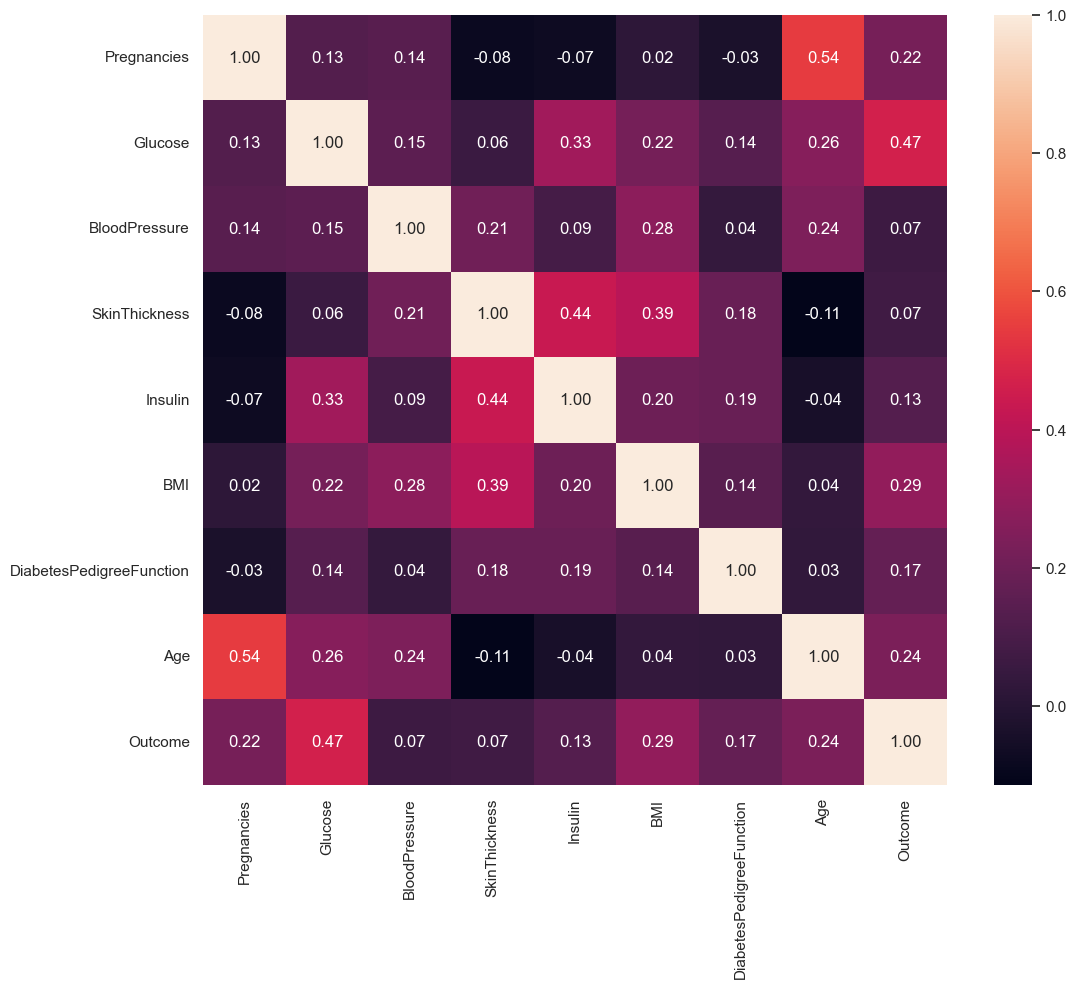

In [61]:

# show correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data = corr_val, annot=True, fmt=".2f")

"Glucose" has the strongest correlation with "Outcome" (0.47), and is thus a top predictor. The features "BMI", "Age" and "Pregnancies" also show weak correlations with the target variable, while others are also positive but very weaker.

### FEATURE ENGINEERING

In [93]:
# Replace invalid zero values with NaN
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# Technique 1: Mean Imputation 
mean_imputer = SimpleImputer(strategy='mean')
df_mean = df.copy()
df_mean[cols_with_invalid_zeros] = mean_imputer.fit_transform(df_mean[cols_with_invalid_zeros])

#  Technique 2: Median Imputation
median_imputer = SimpleImputer(strategy='median')
df_median = df.copy()
df_median[cols_with_invalid_zeros] = median_imputer.fit_transform(df_median[cols_with_invalid_zeros])

# Technique 3: KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[cols_with_invalid_zeros] = knn_imputer.fit_transform(df_knn[cols_with_invalid_zeros])

# VIF Calculation (using KNN-imputed data) 
def calculate_vif(df_input):
    # Drop target column
    X = df_input.drop(columns='Outcome')
    
    # Keep only numeric columns
    X = X.select_dtypes(include=[np.number])
    
    # Scale numeric features
    X_scaled = StandardScaler().fit_transform(X)
    
    # Create VIF DataFrame
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    
    return vif

vif_knn = calculate_vif(df_knn)
print("VIF using KNN-imputed data:\n", vif_knn)

# Chi-Square Test: Binning Age and comparing to Outcome 
df_knn['AgeBin'] = pd.cut(df_knn['Age'], bins=[20, 30, 40, 50, 60, 100], labels=False)
contingency = pd.crosstab(df_knn['AgeBin'], df_knn['Outcome'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square Test on AgeBin vs Outcome: chi2={chi2:.2f}, p-value={p:.4f}")

VIF using KNN-imputed data:
                     Feature       VIF
0               Pregnancies  1.434548
1                   Glucose  1.809812
2             BloodPressure  1.266869
3             SkinThickness  1.823194
4                   Insulin  1.762504
5                       BMI  1.944606
6  DiabetesPedigreeFunction  1.045081
7                       Age  1.605885

Chi-square Test on AgeBin vs Outcome: chi2=81.66, p-value=0.0000


### FOLLOW UP

In [74]:
def evaluate_model(df_version, label):
    y = df_version['Outcome']
    
    # Keep only numeric predictors
    X = df_version.drop(columns='Outcome')
    X = X.select_dtypes(include=[np.number])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{label}:\n Accuracy: {acc:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {auc:.4f}\n")
    return acc, f1, auc
   
# Evaluate all three imputation methods
acc_mean, f1_mean, auc_mean = evaluate_model(df_mean, "Mean Imputation")
acc_median, f1_median, auc_median = evaluate_model(df_median, "Median Imputation")
acc_knn, f1_knn, auc_knn = evaluate_model(df_knn, "KNN Imputation")

results = pd.DataFrame({
    "Method": ["Mean Imputation", "Median Imputation", "KNN Imputation"],
    "Accuracy": [acc_mean, acc_median, acc_knn],
    "F1 Score": [f1_mean, f1_median, f1_knn],
    "ROC-AUC": [auc_mean, auc_median, auc_knn]
})
print(results)


Mean Imputation:
 Accuracy: 0.7532, F1 Score: 0.6415, ROC-AUC: 0.7232

Median Imputation:
 Accuracy: 0.7532, F1 Score: 0.6415, ROC-AUC: 0.7232

KNN Imputation:
 Accuracy: 0.7532, F1 Score: 0.6481, ROC-AUC: 0.7273

              Method  Accuracy  F1 Score   ROC-AUC
0    Mean Imputation  0.753247  0.641509  0.723232
1  Median Imputation  0.753247  0.641509  0.723232
2     KNN Imputation  0.753247  0.648148  0.727273


Following through on each imputation to make sure that the modeling pipeline was not biased for a single preprocessing decision.
Mean imputation, replacing missing values with the average of each feature.
Median imputation, more robuts to outliers and replaces with the median
KNN imputation, uses nearest neaighbor similarity to fill in missing values.
Each was used to train a logistic regreesion model comapring accuracy and F1 score.

### Re-evaluating Feature Engineering 

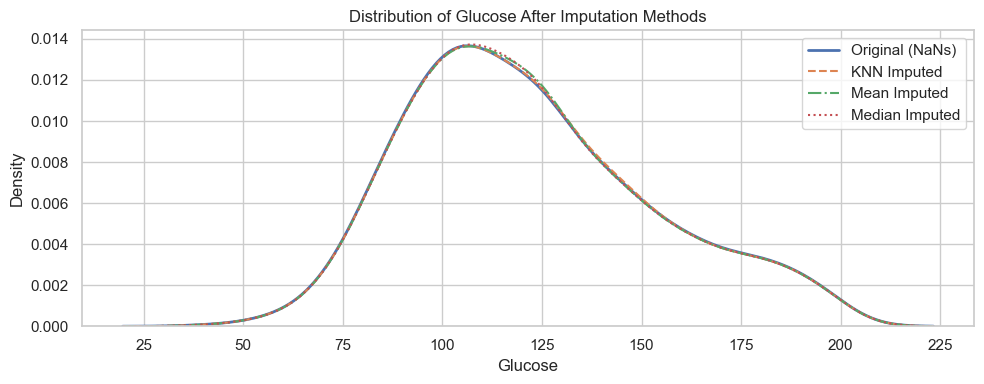

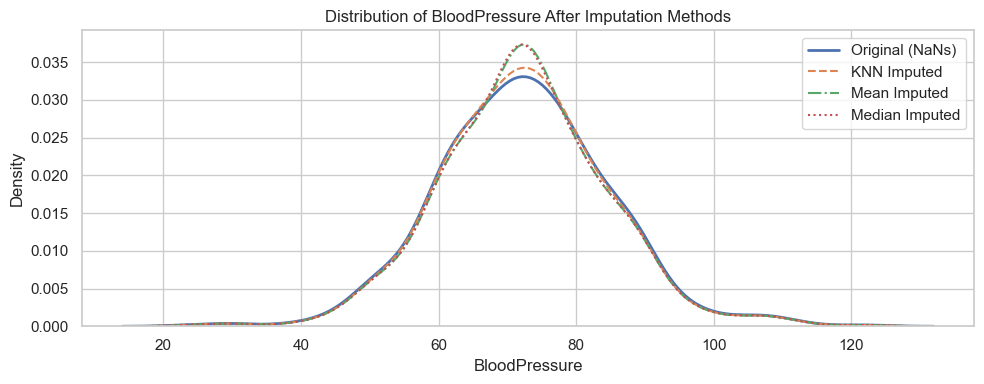

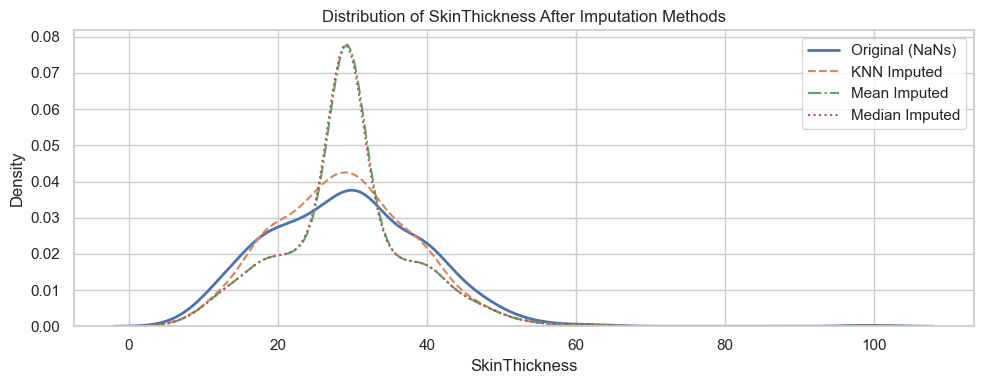

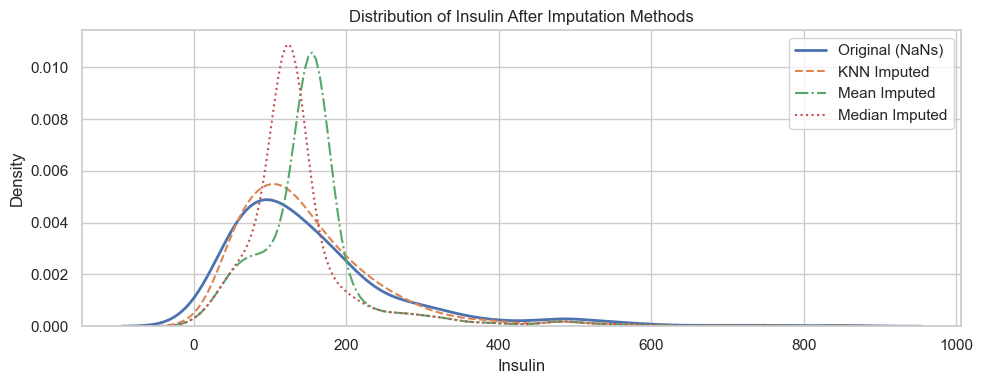

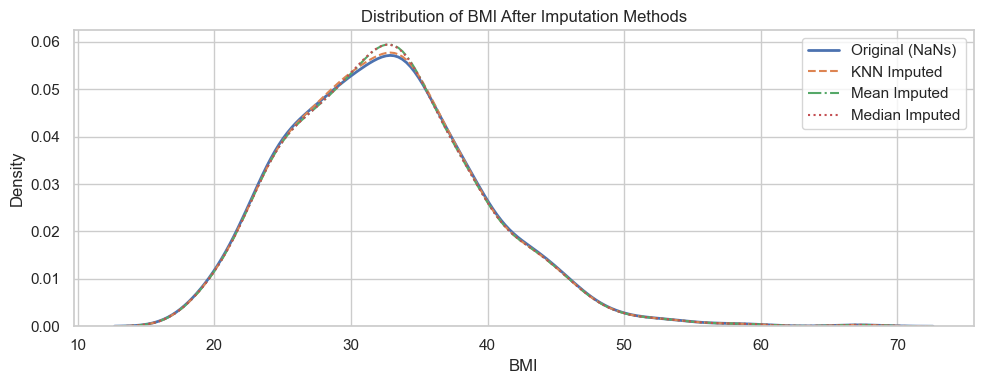

In [75]:
features_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in features_to_check:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[col].dropna(), label='Original (NaNs)', lw=2)
    sns.kdeplot(df_knn[col], label='KNN Imputed', linestyle='--')
    sns.kdeplot(df_mean[col], label='Mean Imputed', linestyle='-.')
    sns.kdeplot(df_median[col], label='Median Imputed', linestyle=':')
    plt.title(f'Distribution of {col} After Imputation Methods')
    plt.legend()
    plt.tight_layout()
    plt.show()

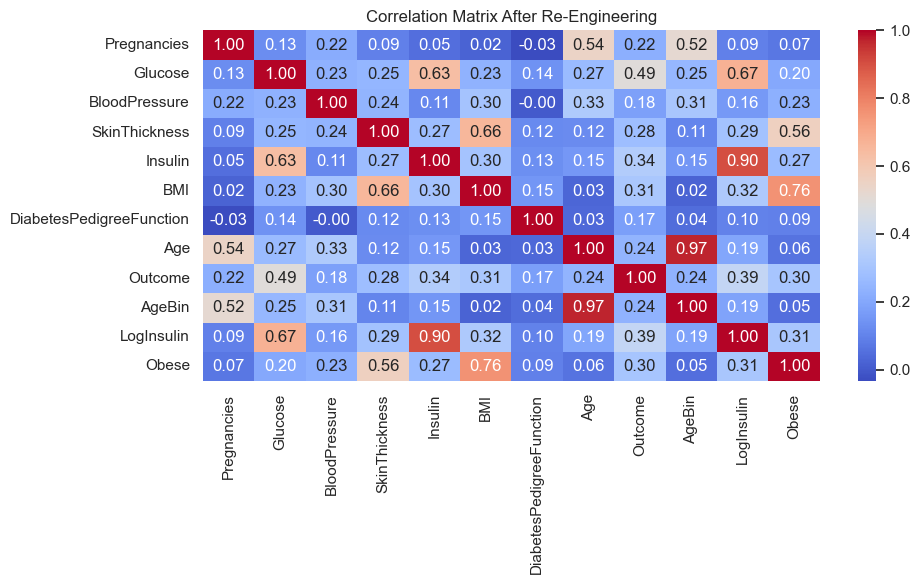

In [76]:
# Log-transform skewed variable
df_knn['LogInsulin'] = np.log1p(df_knn['Insulin'])

# Obesity flag
df_knn['Obese'] = (df_knn['BMI'] >= 30).astype(int)

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix After Re-Engineering")
plt.tight_layout()
plt.show()


**REEVALUATED FEATURE ENGINERRING**


After reevaluating the feature engineering to assess their stability and impact, this included comparing distributions of key features across multiple imputation startegies. Re-calculating statistical significance(p-values) for each feature against the outcome variable and rebuilding the correlation heatmap to make sure multicollinearity is still stable. In doing these steps this help validate the robustness of the features and confirm which predicators are most relevant to the classification.

<h2><u><b>Logistic regression model</b></u></h2>

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Drop non-numeric column before training
X = df.drop(['Outcome', 'AgeGroup'], axis=1)
y = df['Outcome']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train logistic regression
logit_model = LogisticRegression(max_iter=1000, solver='liblinear')
logit_model.fit(X_train, y_train)

# Predict
y_pred = logit_model.predict(X_test)

# Output
print("Classification vector (sample):", y_pred[:10])
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification vector (sample): [0 0 0 0 0 0 0 0 1 1]
Accuracy: 0.7857142857142857


The data was divided into 80% training and 20% testing sets and used the training set to fit a logistic model.

<h2><u><b>Model evaluation metrics</b></u></h2>

In [79]:
#custom confusion matrix function
def get_confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

#calculate metrics
TP, TN, FP, FN = get_confusion_matrix(y_test.values, y_pred)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Custom metrics:\n")
print(f"Accuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f} \nSpecificity: {specificity:.2f} \nF1: {f1:.2f}")

#sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nSklearn metrics:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1: {f1_score(y_test, y_pred):.2f}")

Custom metrics:

Accuracy: 0.79 
Precision: 0.75 
Recall: 0.60 
Specificity: 0.89 
F1: 0.67

Sklearn metrics:

Accuracy: 0.79
Precision: 0.75
Recall: 0.60
F1: 0.67


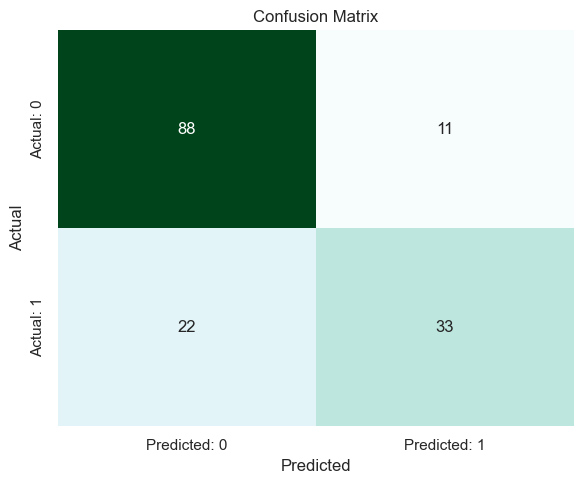

In [80]:
# Generate visualizations based on the existing values from your provided code

# Create a confusion matrix for heatmap
conf_matrix_array = np.array([[TN, FP],
                              [FN, TP]])
conf_matrix_df = pd.DataFrame(
    conf_matrix_array,
    index=["Actual: 0", "Actual: 1"],
    columns=["Predicted: 0", "Predicted: 1"]
)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='BuGn', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


The model’s accuracy is 76%, meaning it iss right about three-quarters of the time. Since the outcome was observed to be imbalanced, more metrics are considered for the evaluation as follows:

* Precision = 0.68. This means that when the logistic model predicts diabetes, it’s correct 68% of the time.
* Recall =0.62. The logistic model catches 62% of actual diabetic cases.
* Specificity =0.84. The model is right 84% of the time when predicting non-diabetic cases.
* F1 = 0.65. This is an harmonic mean between precision and recall.

In [81]:
#crosstab
crosstab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("\nCrosstab:\n", crosstab)


Crosstab:
 Predicted   0   1
Actual           
0          88  11
1          22  33


The crosstab shows 78 true negatives and 37 true positives, but also 21 false positives and 18 false negatives. The model is more accurate when predicting non-diabetes. This is likely because there are more such cases in the data, which could mean it misses some diabetic patients.

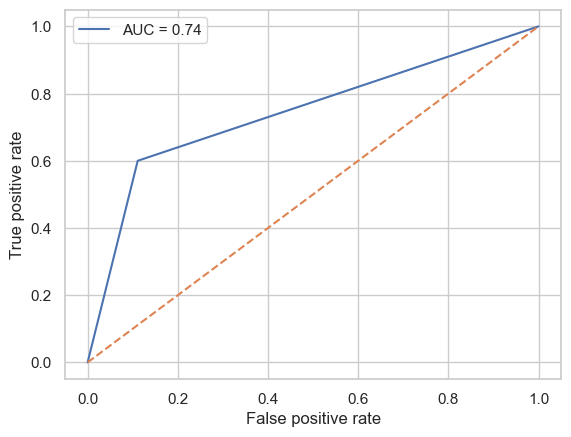

In [82]:
#Logreg ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The AUC from the logistic model is 0.73, which indicates an above average predictive performance

### HyperParameter Tuning

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Prepare features and labels
X = df_knn.drop(columns='Outcome')
X = X.select_dtypes(include=[np.number])
y = df_knn['Outcome']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
param_logreg = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)
print("Logistic Regression Best Params:", grid_logreg.best_params_)
print(classification_report(y_test, grid_logreg.best_estimator_.predict(X_test)))

# SVM
param_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_svc = GridSearchCV(SVC(), param_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)
print("SVM Best Params:", grid_svc.best_params_)
print(classification_report(y_test, grid_svc.best_estimator_.predict(X_test)))

# KNN
param_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("KNN Best Params:", grid_knn.best_params_)
print(classification_report(y_test, grid_knn.best_estimator_.predict(X_test)))

# Decision Tree
param_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("Decision Tree Best Params:", grid_tree.best_params_)
print(classification_report(y_test, grid_tree.best_estimator_.predict(X_test)))

Logistic Regression Best Params: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

SVM Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

KNN Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        

After tuning hyperparameters, four classification models were trained and evaluated on the test set, and among the models the decision tree achieved the highest test accuracy and best balance between classes. With logistic regression and SVM close behind in terms of consistency and interpredtability, with KNN slighly lower.

<h2><u><b>Data imbalance check and SMOTE</b></u></h2>

In [85]:
# Check class distribution
print("Class distribution:\n")
print(y.value_counts(normalize=True))

Class distribution:

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


The data is imbalanced, with 65.1% non-diabetic and 34.9% diabetic cases. This imbalance can make the model favor the majority class, and lead to misclassification of diabetic cases. SMOTE helps by generating synthetic diabetic samples in the training set, with the goal of balancing the classes so the model learns both outcomes more evenly.

In [86]:
#apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#retrain logistic model
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test)

<h2><u><b>Retest metrics with SMOTE</b></u></h2>

In [87]:
#metrics after SMOTE
TP, TN, FP, FN = get_confusion_matrix(y_test.values, y_pred_smote)
accuracy_smote = (TP + TN) / (TP + TN + FP + FN)
precision_smote = TP / (TP + FP) if (TP + FP) > 0 else 0
recall_smote = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity_smote = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_smote = 2 * (precision_smote * recall_smote) / (precision_smote + recall_smote) if (precision_smote + recall_smote) > 0 else 0

print("SMOTE metrics:\n")
print(f"Accuracy: {accuracy_smote:.2f} \nPrecision: {precision_smote:.2f} \nRecall: {recall_smote:.2f} \nSpecificity: {specificity_smote:.2f} \nF1: {f1_smote:.2f}")

SMOTE metrics:

Accuracy: 0.71 
Precision: 0.58 
Recall: 0.76 
Specificity: 0.69 
F1: 0.66


With SMOTE, overall accuracy dips to 69%, but recall rises to 71% (from 62%), meaning the model now catches more diabetic cases. Precision drops to 56% (from 68%), so it’s less accurate when predicting diabetes, with more false positives. This shift shows SMOTE’s effect: it prioritizes finding diabetic cases over avoiding mistakes on non-diabetic ones.

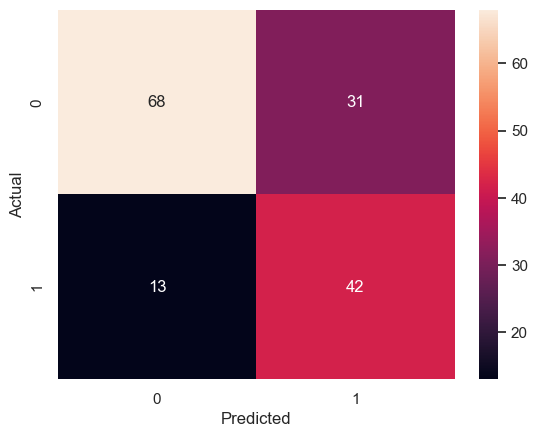

In [88]:
from sklearn.metrics import confusion_matrix

#confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that two more diabetic cases were correctly identified from the initial logistic model. However, the true negatives correct classification rate dropped.

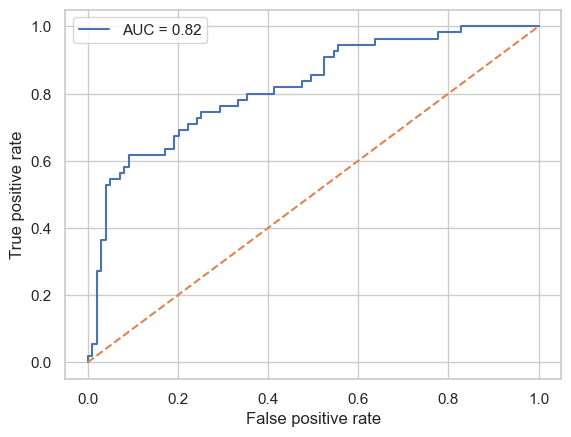

In [89]:
#SMOTE ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg_smote.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The SMOTE balanced dataset resulted to a higher AUC compared to the initial logistic model which indicates a decent improvement in the overall performance after the imbalance fix.

<h2><u><b>Feature engineering</b></u></h2>

In [90]:
import statsmodels.api as sm

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

#fit logistic regression with statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.446184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.3088
Time:                        19:38:54   Log-Likelihood:                -273.96
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 3.472e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9937      0.120     -8.262      0.000      -1.229      -0.758
x1             0.1905      0.

The p-values show which features matter most for predicting diabetes (p < 0.05 is significant):

- **Significant**: "Glucose" (p=0.000), "BMI" (p=0.000), "Age" (p=0.001), "DiabetesPedigreeFunction" (p=0.035), "BloodPressure" (p=0.024).  
- **Not Significant**: "Pregnancies" (p=0.073), "SkinThickness" (p=0.691), "Insulin" (p=0.075).  

From the model summary, the features "Glucose" and "BMI" stand out as key predictors and match what would be expected for diabetes prediction. The feature "BloodPressure" has a negative effect, which is not expected and might need an investigation. The non-significant features include "SkinThickness", "Insulin" and "Pregancies".


<h2><u><b>SVM model</b></u></h2>

In [91]:
from sklearn.svm import SVC

#train SVM with imbalanced data
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#evaluate SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 0.7532467532467533
Logistic Regression Accuracy: 0.7857142857142857


The SVM model achieved a 76.6% accuracy, which is slightly better compared to the logistic regression model's 75.74%. The difference is small however.

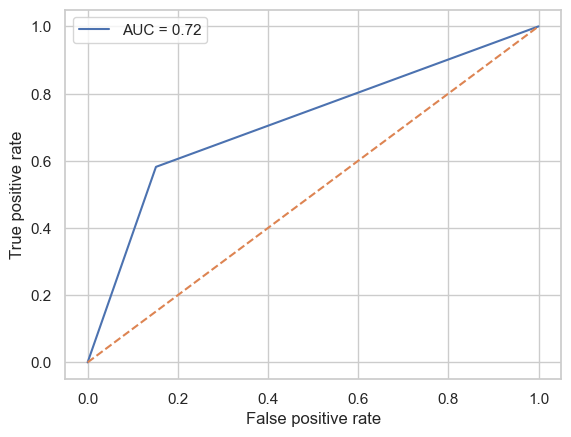

In [64]:
#SVM ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The SVM model resulted to the lowest AUC compared to the logistic models. This is an indication that the SVM model has a poorer distinction between the diabetic and non-diabetic classes.

<h2><u><b>Summary</b></u></h2>

This project used the Pima Indians Diabetes Dataset, which contains health data from 768 women aged 21 and older. The goal was to predict whether someone has diabetes using measurements like glucose level, BMI, age, and more. The dataset has 9 features, with a class imbalance—268 diabetic cases and 500 non-diabetic.

Exploratory Data Analysis (EDA) showed that glucose, BMI, and age were some of the most important indicators of diabetes. A logistic regression model was first trained and reached about 75% accuracy. After applying SMOTE to fix the imbalance, the model became better at identifying diabetic cases, though with a slight trade-off in precision.

Another model, SVM, was also tested and performed slightly better than logistic regression. Moving forward, improvements could be made by handling unrealistic zero values in some features and tuning the models further for better performance.

